# This peice of code is to import all the modules we would need in the subsequent code:




In [315]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from PIL import Image



# Lets load the Cat vs NonCat data set and visualise the tables available.

In [316]:
train_dataset = h5py.File('train_catvnoncat.h5', 'r')
test_dataset = h5py.File('test_catvnoncat.h5', 'r')
print(train_dataset.keys())
print(test_dataset.keys())


<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


# Lets setup the Training and test sets of the data.

In [317]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(train_dataset["list_classes"][:])

    
print('\n Extracted Values for Classes are {0} & {1} \n'.format(classes[0].decode("utf-8"), classes[1].decode("utf-8")))

train_set_x_orig.shape, test_set_x_orig.shape


 Extracted Values for Classes are non-cat & cat 



((209, 64, 64, 3), (50, 64, 64, 3))

# Lets reshape and normalise the test and train datasets

In [331]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
n_pix = train_set_x_orig.shape[1]

train_set_x_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
     
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

train_set_x = normalise(train_set_x_flat)
test_set_x = normalise(test_set_x_flat)
#train_set_x = train_set_x_flat/255
#test_set_x = test_set_x_flat/255

w,b = initialise_params(train_set_x.shape[0])

train_set_x_flat.shape, test_set_x_flat.shape, train_set_y_orig.shape, train_set_y.shape, w.shape


((12288, 209), (12288, 50), (209,), (1, 209), (12288, 1))

y = [1], it's a 'cat' picture.


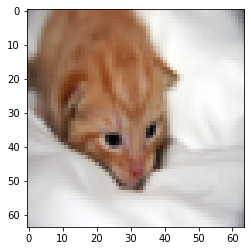

In [319]:
index = 57
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")


# This is a function to normalise the input datasets. For an image divide by 255 works just fine.

In [333]:
def normalise(x):
    #x_mean = np.mean(x, axis =1, keepdims = True)
    #x_std = np.std(x, axis =1, keepdims = True)
    #x_norm = (x - x_mean)/x_std
    #train_set_x.shape, x_mean.shape, x_std.shape, x_norm.shape
    #return x_norm
    return x/255

# This is the method to initialise parameters for the neural network

In [289]:
def initialise_params(length):
    #w = np.zeros((length,1))
    w = np.random.randn(length,1)/100
    
    b= 0
    
    assert(w.shape == (length, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w,b

In [287]:
ww = np.random.randn(5,2)/100
ww

array([[-0.00196951, -0.00292712],
       [-0.00224953, -0.02610725],
       [-0.00455862, -0.00060029],
       [-0.00111558, -0.000433  ],
       [ 0.00077731, -0.0137013 ]])

# This is the method to find/calculate the sigmoid

In [88]:
def sigmoid(X):
    sig = 1/(1 + np.exp(-X))
    return sig

In [75]:
#print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

# This is the method to calculate one forward pass, it will return the gradient and cost.

In [338]:
def propogate(w,b,X,Y):
    
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    
    A= sigmoid(Z)
    
    cost = (-1/m)*(np.sum(Y * np.log(A) + (1-Y)* np.log(1-A)))
    
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {
        "dw" : dw,
        "db" : db        
    }
    
    return grads, cost

In [339]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2,-3],[3,2,-3.4]]), np.array([[1,0,1]])
grads, cost = propogate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[1.6659924 ]
 [1.79918886]]
db = -1.639251382220171e-05
cost = 5.26695615320782


### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [163]:
def optimise(w, b, X, Y, num_iter, learning_rate, print_cost = True):
    
    costs = []
    for i in range(num_iter):
        grads, cost  = propogate(w,b,X,Y)
        if(i%100 == 0):
            costs.append(cost)        
        dw = grads["dw"]
        db = grads["db"]
         
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        intervals = num_iter /10
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        params = {
            "w" : w,
            "b" : b
        }
        
        grads = {
            "dw" : dw,
            "db" : db
        }
        
    return params, grads, costs
    

In [341]:
params, grads, costs = optimise(w, b, X, Y, num_iter= 1000, learning_rate = 0.9, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.266956
Cost after iteration 100: 0.024279
Cost after iteration 200: 0.012064
Cost after iteration 300: 0.008002
Cost after iteration 400: 0.005981
Cost after iteration 500: 0.004773
Cost after iteration 600: 0.003970
Cost after iteration 700: 0.003398
Cost after iteration 800: 0.002970
Cost after iteration 900: 0.002637
w = [[-7.3864365 ]
 [ 3.89936882]]
b = 1.3779428917392693
dw = [[ 0.00137804]
 [-0.00086598]]
db = 9.823309146090664e-05


In [142]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] >= 0.5:
            Y_prediction[0,i] = 1
            
    assert(Y_prediction.shape == (1, m))
    return Y_prediction


In [246]:
def LogisticRegressionModel(X_train, Y_train,X_test, Y_test, num_iter= 2000, learn_rate = 0.5, viewCost = False):
    
    w,b  = initialise_params(X_train.shape[0])
    params, grads, costs = optimise(w, b, X_train, Y_train, num_iter, learn_rate, viewCost)
    
    w = params["w"]
    b = params["b"]
    
    Y_train_predictions = predict(w,b,X_train)
    Y_test_predictions = predict(w,b,X_test)    
    
    #index = 55
    #plt.imshow(train_set_x_orig[index])
    #print('This is a : ' ,classes[train_set_y_orig[index]].decode("utf-8"))
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predictions - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_predictions - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_test_predictions, 
         "Y_prediction_train" : Y_train_predictions, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learn_rate,
         "num_iterations": num_iter}
    
    return d

Cost after iteration 0: 0.789918
Cost after iteration 100: 0.219365
Cost after iteration 200: 0.136434
Cost after iteration 300: 0.099271
Cost after iteration 400: 0.077518
Cost after iteration 500: 0.063300
Cost after iteration 600: 0.053327
Cost after iteration 700: 0.045975
Cost after iteration 800: 0.040348
Cost after iteration 900: 0.035914
Cost after iteration 1000: 0.032336
Cost after iteration 1100: 0.029391
Cost after iteration 1200: 0.026928
Cost after iteration 1300: 0.024838
Cost after iteration 1400: 0.023044
Cost after iteration 1500: 0.021487
Cost after iteration 1600: 0.020125
Cost after iteration 1700: 0.018923
Cost after iteration 1800: 0.017854
Cost after iteration 1900: 0.016898
train accuracy: 100.0 %
test accuracy: 60.0 %


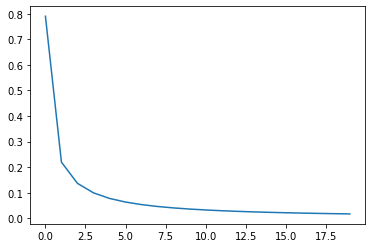

In [332]:
d = LogisticRegressionModel(train_set_x, train_set_y, test_set_x, test_set_y, 2000, 0.005, True)

costs = d["costs"]
plt.plot(costs)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

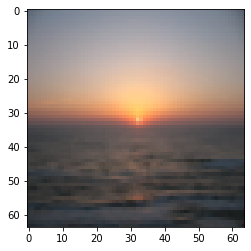

In [350]:

w = d["w"]
b = d["b"]
Y_predictions = predict(w, b, test_set_x)
Y_predictions.shape

index = 35
plt.imshow(test_set_x_orig[index])
print ("y = " + str(Y_predictions[0][index]) + ", it's a '" + classes[np.squeeze(Y_predictions[0][index])].decode("utf-8") +  "' picture.")




In [259]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)
B

B.shape

(4, 1)